In [1]:
import numpy as np
import cv2
import os
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization, UpSampling2D, concatenate 


In [2]:
source = 'C://Users//dangq//OneDrive//Máy tính//USTH//ICT//MLMED2025//mlmed2025//Pratical 2//dataset//training_set'
output = 'C://Users//dangq//OneDrive//Máy tính//USTH//ICT//MLMED2025//mlmed2025//Pratical 2//dataset//groundtruth'
output_1 = 'C://Users//dangq//OneDrive//Máy tính//USTH//ICT//MLMED2025//mlmed2025//Pratical 2//dataset//origin'


os.makedirs(output, exist_ok = True)
os.makedirs(output_1, exist_ok = True)

for filename in os.listdir(source):
    if "_Annotation.png" in filename:  # Modify filter based on your annotation file naming
        shutil.copy(os.path.join(source, filename), os.path.join(output, filename))
    else:
        shutil.copy(os.path.join(source, filename), os.path.join(output_1, filename))


Original Shape: (540, 800, 3)
Resized Shape: (256, 256, 3)


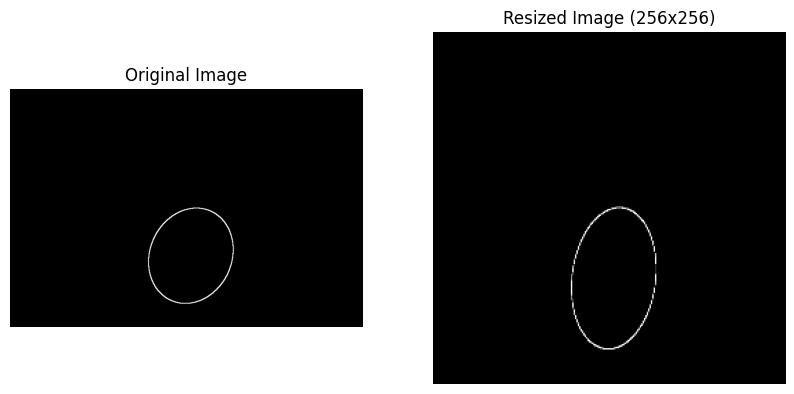

In [3]:
image_test = cv2.imread("000_HC_Annotation.png")

# Show the shape before reshape
print("Original Shape:", image_test.shape)

# Convert BGR to RGB (Matplotlib expects RGB format)
image_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

# Resize the image to (256,256,3)
image_resized = cv2.resize(image_rgb, (256, 256))  # Resizing only width & height

# Show the shape after reshape
print("Resized Shape:", image_resized.shape)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")  # Hide axes

# Show resized image
ax[1].imshow(image_resized)
ax[1].set_title("Resized Image (256x256)")
ax[1].axis("off")

# Display the images
plt.show()

In [4]:
orig_h, orig_w = image_rgb.shape[:2]
print(orig_h, orig_w)

540 800


Original Shape: (540, 800, 3)
Resized Shape: (172, 256, 3)
Padded Image Shape: (256, 256, 3)


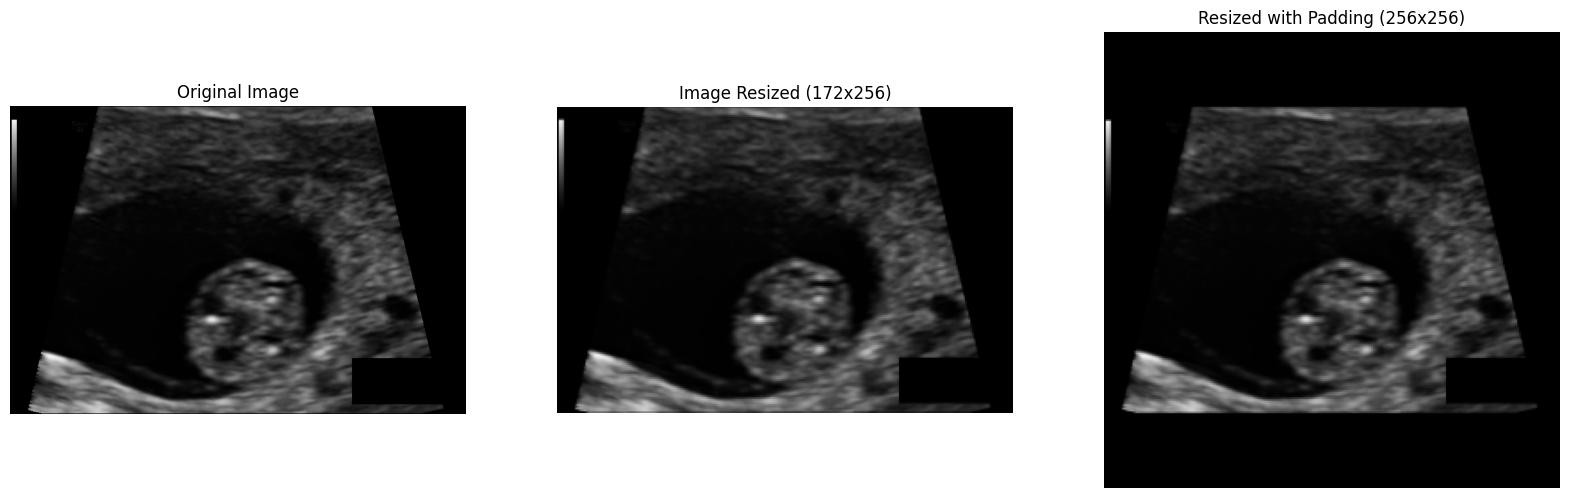

In [5]:

# Read the image
image_test = cv2.imread("000_HC.png")
image_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Get original shape
orig_h, orig_w = image_rgb.shape[:2]
target_size = 256  # Resize to (256,256)

# Compute aspect ratio & new size
scale = min(target_size / orig_w, target_size / orig_h)  # Maintain aspect ratio
new_w = int(orig_w * scale)
new_h = int(orig_h * scale)

# Resize while keeping aspect ratio
image_resized = cv2.resize(image_rgb, (new_w, new_h), interpolation=cv2.INTER_AREA)

# Create black canvas (padded image)
padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)

# Compute padding (center the image)
pad_x = (target_size - new_w) // 2
pad_y = (target_size - new_h) // 2

# Place resized image on black background
padded_image[pad_y:pad_y+new_h, pad_x:pad_x+new_w] = image_resized

# Show shapes
print("Original Shape:", image_rgb.shape)
print("Resized Shape:", image_resized.shape)
print("Padded Image Shape:", padded_image.shape)

# Plot images
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(image_resized)
ax[1].set_title("Image Resized (172x256)")
ax[1].axis("off")

ax[2].imshow(padded_image)
ax[2].set_title("Resized with Padding (256x256)")
ax[2].axis("off")

plt.show()


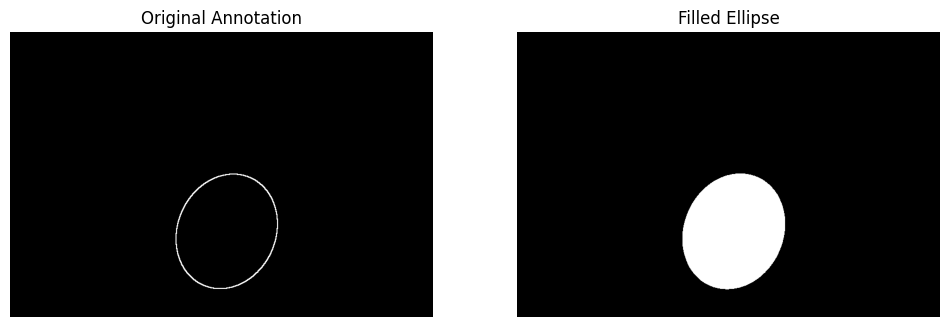

In [6]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("000_HC_Annotation.png", cv2.IMREAD_GRAYSCALE)

# Convert to BGR if needed
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw filled ellipse on the image
for cnt in contours:
    ellipse = cv2.fitEllipse(cnt)  # Fit ellipse to the contour
    cv2.ellipse(image_color, ellipse, (255, 255, 255), -1)  # Fill ellipse with white color


# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)


# PLot
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original grayscale image
axes[0].imshow(image, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Original Annotation")

# Plot filled ellipse image
axes[1].imshow(image_rgb)
axes[1].axis("off")
axes[1].set_title("Filled Ellipse")

# Show the figure
plt.show()

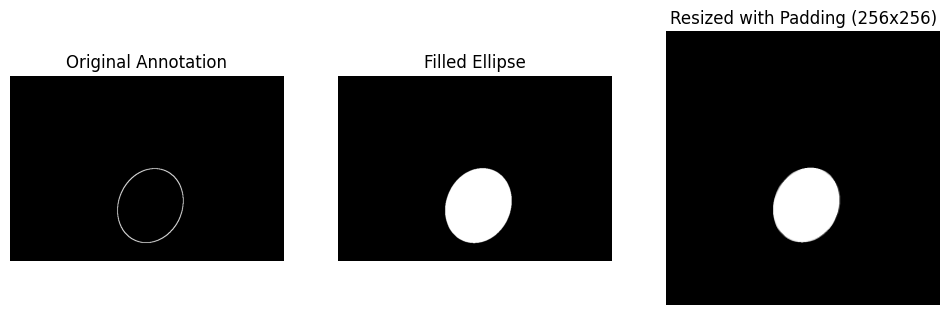

In [7]:
# Load the image
image = cv2.imread("000_HC_Annotation.png", cv2.IMREAD_GRAYSCALE)

# Convert to BGR if needed
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw filled ellipse on the image
for cnt in contours:
    ellipse = cv2.fitEllipse(cnt)  # Fit ellipse to the contour
    cv2.ellipse(image_color, ellipse, (255, 255, 255), -1)  # Fill ellipse with white color


# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Get the original shape
h, w = image_rgb.shape[:2]

# Set rescale size target 
target_size = 256 # (256,256)

# Compute aspect ratio & new size
scale = min(target_size / w, target_size / h)
new_w = int(w * scale)
new_h = int(h * scale)

# Resize while keeping aspect ration 
image_resized = cv2.resize(image_rgb, (new_w, new_h), interpolation=cv2.INTER_AREA)

# Create black canvas (padded image)
padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)

# Compute padding (center the image)
pad_x = (target_size - new_w) // 2
pad_y = (target_size - new_h) // 2

# Place resized image on black background
padded_image[pad_y:pad_y+new_h, pad_x:pad_x+new_w] = image_resized

# PLot
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot original grayscale image
axes[0].imshow(image, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Original Annotation")

# Plot filled ellipse image
axes[1].imshow(image_rgb)
axes[1].axis("off")
axes[1].set_title("Filled Ellipse")

# Plot Padded Image
axes[2].imshow(padded_image)
axes[2].set_title("Resized with Padding (256x256)")
axes[2].axis("off")

# Show the figure
plt.show()

In [8]:
groundtruth = "C://Users//dangq//OneDrive//Máy tính//USTH//ICT//MLMED2025//mlmed2025//Pratical 2//dataset//groundtruth"
groundtruth_filled = "C://Users//dangq//OneDrive//Máy tính//USTH//ICT//MLMED2025//mlmed2025//Pratical 2//dataset//groundtruth_filled"
os.makedirs(groundtruth_filled, exist_ok = True)

for filename in os.listdir(groundtruth):

    img_path_join = os.path.join("dataset/groundtruth/",filename)

    print(img_path_join)

    # Load images
    image = cv2.imread(img_path_join, cv2.COLOR_GRAY2BGR)

    if image is None:
        print(f"Failed to load image: {img_path_join}")
        continue  # Skip files that can't be read as images

    # Convert to BGR if needed
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw filled ellipse on the image
    for cnt in contours:
        ellipse = cv2.fitEllipse(cnt)  # Fit ellipse to the contour
        cv2.ellipse(image_color, ellipse, (255, 255, 255), -1)  # Fill ellipse with white color


    # Convert BGR to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)


    # Get the original shape
    h, w = image_rgb.shape[:2]

    # Set rescale size target 
    target_size = 256 # (256,256)

    # Compute aspect ratio & new size
    scale = min(target_size / w, target_size / h)
    new_w = int(w * scale)
    new_h = int(h * scale)

    # Resize while keeping aspect ration 
    image_resized = cv2.resize(image_rgb, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Create black canvas (padded image)
    padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)

    # Compute padding (center the image)
    pad_x = (target_size - new_w) // 2
    pad_y = (target_size - new_h) // 2

    # Place resized image on black background
    padded_image[pad_y:pad_y+new_h, pad_x:pad_x+new_w] = image_resized


    cv2.imwrite(f"dataset/groundtruth_filled/{filename}", padded_image)



dataset/groundtruth/000_HC_Annotation.png
dataset/groundtruth/001_HC_Annotation.png
dataset/groundtruth/002_HC_Annotation.png
dataset/groundtruth/003_HC_Annotation.png
dataset/groundtruth/004_HC_Annotation.png
dataset/groundtruth/005_HC_Annotation.png
dataset/groundtruth/006_HC_Annotation.png
dataset/groundtruth/007_HC_Annotation.png
dataset/groundtruth/008_HC_Annotation.png
dataset/groundtruth/009_HC_Annotation.png
dataset/groundtruth/010_2HC_Annotation.png
dataset/groundtruth/010_HC_Annotation.png
dataset/groundtruth/011_HC_Annotation.png
dataset/groundtruth/012_HC_Annotation.png
dataset/groundtruth/013_HC_Annotation.png
dataset/groundtruth/014_2HC_Annotation.png
dataset/groundtruth/014_3HC_Annotation.png
dataset/groundtruth/014_HC_Annotation.png
dataset/groundtruth/015_HC_Annotation.png
dataset/groundtruth/016_HC_Annotation.png
dataset/groundtruth/017_2HC_Annotation.png
dataset/groundtruth/017_HC_Annotation.png
dataset/groundtruth/018_HC_Annotation.png
dataset/groundtruth/019_2HC_An

In [9]:
origin_resized = "C://Users//dangq//OneDrive//Máy tính//USTH//ICT//MLMED2025//mlmed2025//Pratical 2//dataset//origin_resized"
os.makedirs(origin_resized, exist_ok = True)

for filename in os.listdir(output_1):

    img_path_join = os.path.join("dataset/origin/",filename)

    print(img_path_join)

    # Load images
    image = cv2.imread(img_path_join, cv2.COLOR_GRAY2BGR)

    # Convert BGR to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    # Get the original shape
    h, w = image_rgb.shape[:2]

    # Set rescale size target 
    target_size = 256 # (256,256)

    # Compute aspect ratio & new size
    scale = min(target_size / w, target_size / h)
    new_w = int(w * scale)
    new_h = int(h * scale)

    # Resize while keeping aspect ration 
    image_resized = cv2.resize(image_rgb, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Create black canvas (padded image)
    padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)

    # Compute padding (center the image)
    pad_x = (target_size - new_w) // 2
    pad_y = (target_size - new_h) // 2

    # Place resized image on black background
    padded_image[pad_y:pad_y+new_h, pad_x:pad_x+new_w] = image_resized


    cv2.imwrite(f"dataset/origin_resized/{filename}", padded_image)



dataset/origin/000_HC.png
dataset/origin/001_HC.png
dataset/origin/002_HC.png
dataset/origin/003_HC.png
dataset/origin/004_HC.png
dataset/origin/005_HC.png
dataset/origin/006_HC.png
dataset/origin/007_HC.png
dataset/origin/008_HC.png
dataset/origin/009_HC.png
dataset/origin/010_2HC.png
dataset/origin/010_HC.png
dataset/origin/011_HC.png
dataset/origin/012_HC.png
dataset/origin/013_HC.png
dataset/origin/014_2HC.png
dataset/origin/014_3HC.png
dataset/origin/014_HC.png
dataset/origin/015_HC.png
dataset/origin/016_HC.png
dataset/origin/017_2HC.png
dataset/origin/017_HC.png
dataset/origin/018_HC.png
dataset/origin/019_2HC.png
dataset/origin/019_HC.png
dataset/origin/020_HC.png
dataset/origin/021_HC.png
dataset/origin/022_2HC.png
dataset/origin/022_HC.png
dataset/origin/023_2HC.png
dataset/origin/023_HC.png
dataset/origin/024_HC.png
dataset/origin/025_HC.png
dataset/origin/026_2HC.png
dataset/origin/026_HC.png
dataset/origin/027_HC.png
dataset/origin/028_HC.png
dataset/origin/029_HC.png
data

# Train/test/valid split (mai lam)

In [10]:
folder_path = "dataset/groundtruth_filled/"
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
print(f"Number of files: {file_count}")

Number of files: 999


In [11]:
train_origin_dir = "dataset/split/train_image"
train_mask_dir = "dataset//split/train_mask"
test_origin_dir = "dataset/split/test_image"
test_mask_dir = "dataset//split/test_mask"
valid_origin_dir = "dataset/split/valid_image"
valid_mask_dir = "dataset//split/valid_mask"

for d in [train_origin_dir, train_mask_dir, test_origin_dir, test_mask_dir, valid_origin_dir, valid_mask_dir]:
    os.makedirs(d, exist_ok = True)

In [12]:
len(os.listdir(train_origin_dir))

0

Make a copy of the images for training data/testing data

In [13]:
count = 0

# Get current file count in train_origin_dir
current_count = len(os.listdir(train_origin_dir))

for filename in os.listdir(origin_resized):

    source_path = os.path.join(origin_resized, filename)

    if current_count + count < 800:
        destination_path = os.path.join(train_origin_dir, filename)
        print(f"Moved training files. Total in {train_origin_dir}: {len(os.listdir(train_origin_dir))+1}")
    else:
        destination_path = os.path.join(test_origin_dir, filename)
        print(f"Moved testing files. Total in {test_origin_dir}: {len(os.listdir(test_origin_dir))+1}")

    shutil.copy(source_path, destination_path)  # Copy file from source to destination 
    count += 1



Moved training files. Total in dataset/split/train_image: 1
Moved training files. Total in dataset/split/train_image: 2
Moved training files. Total in dataset/split/train_image: 3
Moved training files. Total in dataset/split/train_image: 4
Moved training files. Total in dataset/split/train_image: 5
Moved training files. Total in dataset/split/train_image: 6
Moved training files. Total in dataset/split/train_image: 7
Moved training files. Total in dataset/split/train_image: 8
Moved training files. Total in dataset/split/train_image: 9
Moved training files. Total in dataset/split/train_image: 10
Moved training files. Total in dataset/split/train_image: 11
Moved training files. Total in dataset/split/train_image: 12
Moved training files. Total in dataset/split/train_image: 13
Moved training files. Total in dataset/split/train_image: 14
Moved training files. Total in dataset/split/train_image: 15
Moved training files. Total in dataset/split/train_image: 16
Moved training files. Total in da

In [14]:
count = 0

# Get current file count in train_origin_dir
current_count = len(os.listdir(train_mask_dir))

for filename in os.listdir(groundtruth_filled):

    source_path = os.path.join(groundtruth_filled, filename)

    if current_count + count < 800:
        destination_path = os.path.join(train_mask_dir, filename)
        print(f"Moved training files. Total in {train_mask_dir}: {len(os.listdir(train_mask_dir))+1}")
    else:
        destination_path = os.path.join(test_mask_dir, filename)
        print(f"Moved testing files. Total in {test_mask_dir}: {len(os.listdir(test_mask_dir))+1}")

    shutil.copy(source_path, destination_path)  # Copy file from source to destination 
    count += 1



Moved training files. Total in dataset//split/train_mask: 1
Moved training files. Total in dataset//split/train_mask: 2
Moved training files. Total in dataset//split/train_mask: 3
Moved training files. Total in dataset//split/train_mask: 4
Moved training files. Total in dataset//split/train_mask: 5
Moved training files. Total in dataset//split/train_mask: 6
Moved training files. Total in dataset//split/train_mask: 7
Moved training files. Total in dataset//split/train_mask: 8
Moved training files. Total in dataset//split/train_mask: 9
Moved training files. Total in dataset//split/train_mask: 10
Moved training files. Total in dataset//split/train_mask: 11
Moved training files. Total in dataset//split/train_mask: 12
Moved training files. Total in dataset//split/train_mask: 13
Moved training files. Total in dataset//split/train_mask: 14
Moved training files. Total in dataset//split/train_mask: 15
Moved training files. Total in dataset//split/train_mask: 16
Moved training files. Total in da

In [15]:
count = 0
count_1= 0

for filename in os.listdir(train_origin_dir):
    if count >= 160:
        break
    source_path = os.path.join(train_origin_dir, filename)
    destination_path = os.path.join(valid_origin_dir, filename)
    print(f"Moved training files. Total in {valid_origin_dir}: {len(os.listdir(valid_origin_dir))+1}")

    shutil.move(source_path, destination_path)  # Move file from source to destination 
    count += 1

for filename in os.listdir(train_mask_dir):
    if count_1 >= 160:
        break
    source_path = os.path.join(train_mask_dir, filename)
    destination_path = os.path.join(valid_mask_dir, filename)
    print(f"Moved training files. Total in {valid_mask_dir}: {len(os.listdir(valid_mask_dir))+1}")

    shutil.move(source_path, destination_path)  # Move file from source to destination 
    count_1 += 1



Moved training files. Total in dataset/split/valid_image: 1
Moved training files. Total in dataset/split/valid_image: 2
Moved training files. Total in dataset/split/valid_image: 3
Moved training files. Total in dataset/split/valid_image: 4
Moved training files. Total in dataset/split/valid_image: 5
Moved training files. Total in dataset/split/valid_image: 6
Moved training files. Total in dataset/split/valid_image: 7
Moved training files. Total in dataset/split/valid_image: 8
Moved training files. Total in dataset/split/valid_image: 9
Moved training files. Total in dataset/split/valid_image: 10
Moved training files. Total in dataset/split/valid_image: 11
Moved training files. Total in dataset/split/valid_image: 12
Moved training files. Total in dataset/split/valid_image: 13
Moved training files. Total in dataset/split/valid_image: 14
Moved training files. Total in dataset/split/valid_image: 15
Moved training files. Total in dataset/split/valid_image: 16
Moved training files. Total in da

In [16]:
# folder_path = "dataset/train_image/"
# file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
# print(f"Number of files: {file_count}")